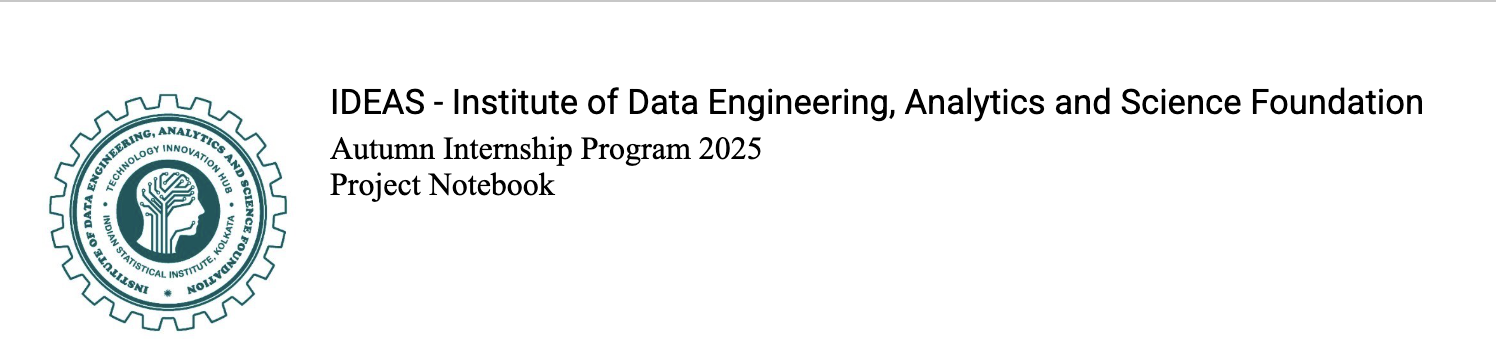

#  Diabetes Prediction: Classification Comparison + Metrics + Evaluation

## Created by: Rounak Biswas
### Designation:

This notebook is structured as an **assignment**. The goal is to build a machine learning workflow for predicting diabetes, compare models, and evaluate them using metrics.

The structure is provided, but you are expected to fill in the details.

##  Problem Statement

You are tasked with building a classification model to predict whether a patient has diabetes based on diagnostic measurements.

- Use the **Pima Indian Diabetes Dataset**.
- Compare multiple classification models.
- Evaluate them using accuracy, precision, recall, F1, ROC-AUC.
- Extend the workflow to a new dataset of your choice.



---


##  Dataset Introduction

The dataset contains medical predictor variables and one target variable (`Outcome`).

- Pregnancies
- Glucose
- Blood Pressure
- Skin Thickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age
- Outcome (0 = No Diabetes, 1 = Diabetes)


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report



---



##  Data Loading

In [ ]:
# Load dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1




---



##  Exploratory Data Analysis (EDA)

- Check dataset shape
- Missing values
- Basic statistics
- Correlation heatmap
- Distribution plots


In [ ]:
# Basic EDA
print(df.shape)
print(df.info())
df.describe()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


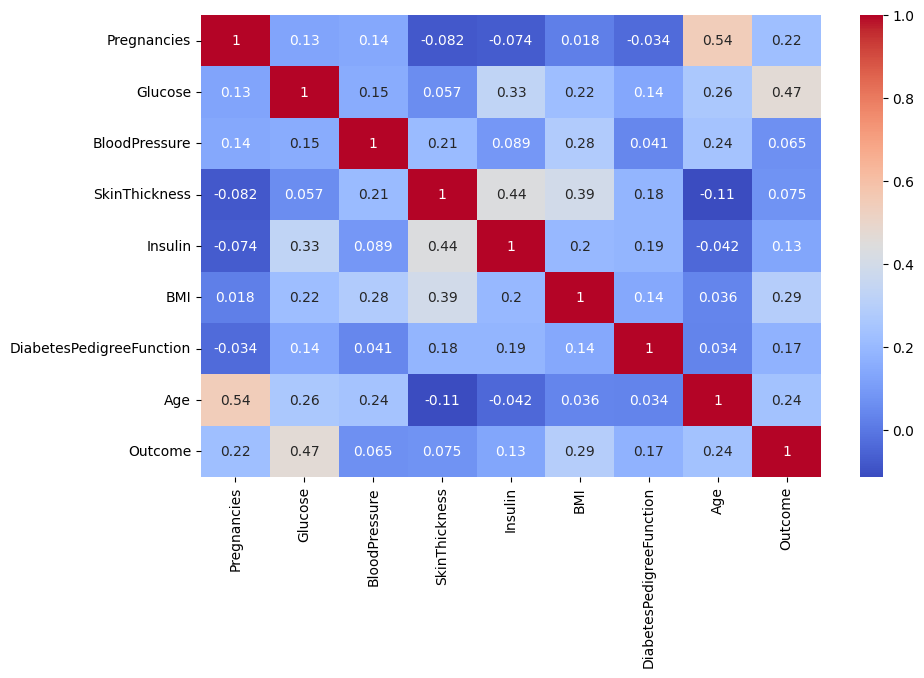

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()



---



##  Data Preprocessing & Train/Test Split

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)




---



# Data Scaling

In [29]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



---



# Machine Learning Models

## KNN Classifier

In [32]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Results:
Accuracy: 0.7083333333333334
[[102  23]
 [ 33  34]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.78       125
           1       0.60      0.51      0.55        67

    accuracy                           0.71       192
   macro avg       0.68      0.66      0.67       192
weighted avg       0.70      0.71      0.70       192



## Support Vector Machine

In [33]:
# SVM Model
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.7083333333333334
[[103  22]
 [ 34  33]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.79       125
           1       0.60      0.49      0.54        67

    accuracy                           0.71       192
   macro avg       0.68      0.66      0.66       192
weighted avg       0.70      0.71      0.70       192



#

###  Evaluation

Compare the models using metrics and visualize results:

- Confusion matrices
- ROC curves
- Metric comparison table


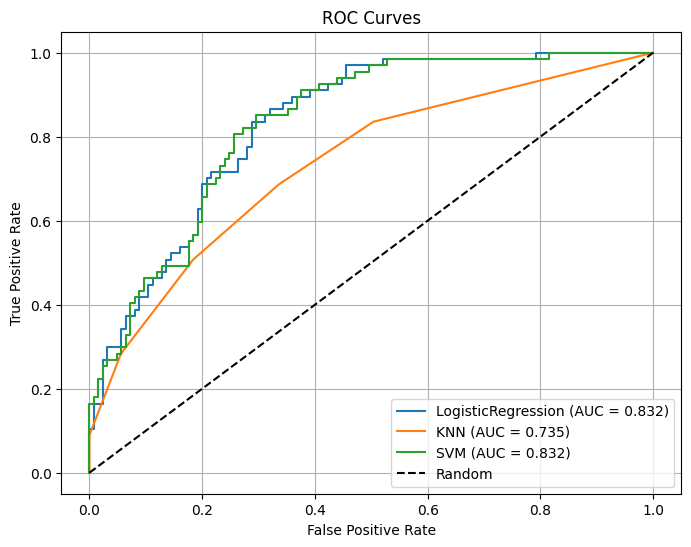

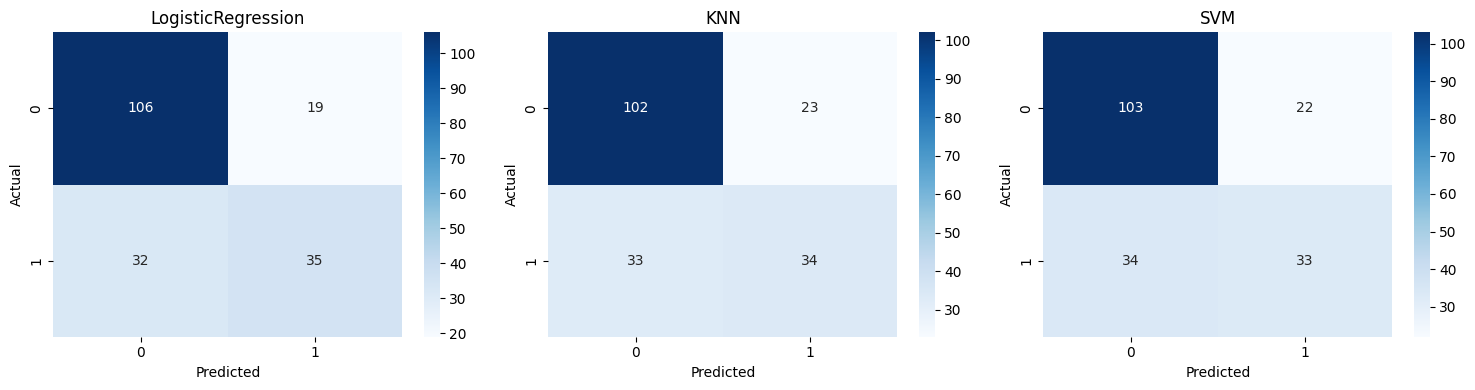

Saved results to diabetes_model_comparison_results.csv


In [ ]:
#  Plot ROC curves for all models
plt.figure(figsize=(8,6))
for name, (model, y_pred, y_proba) in trained.items():
    # y_proba may already be scores
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0,1],[0,1],"k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

# Display & visualize confusion matrices side-by-side
fig, axes = plt.subplots(1, len(trained), figsize=(5*len(trained),4))
if len(trained) == 1:
    axes = [axes]
for ax, (name, (model, y_pred, _)) in zip(axes, trained.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap="Blues")
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

# Save result table for later
results_df.to_csv("diabetes_model_comparison_results.csv")
print("Saved results to diabetes_model_comparison_results.csv")




---



##  Apply Workflow on Another Dataset

Repeat the same steps on a dataset of your choice (e.g., Breast Cancer, Titanic, etc.).

# Introduction


The cancer dataset used in this study contains records of 30 patients and provides key demographic, clinical, and treatment information related to cancer. Each record includes variables such as gender, cancer type, stage of the disease, metastasis status, and treatment type. This dataset is designed primarily for educational and analytical purposes, allowing students and researchers to practice data preprocessing, encoding categorical variables, and applying various machine learning models. Although small in size, it reflects the structure of real-world medical data and helps in understanding how clinical features can be used to predict outcomes such as the presence or absence of metastasis. By working with this dataset, one can learn to compare classification algorithms such as Logistic Regression, K-Nearest Neighbors, and Support Vector Machines, and evaluate them using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.




---


##  Dataset Introduction

The dataset contains medical predictor variables and one target variable (`Outcome`).

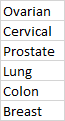


##  Conclusion

Summarize the findings:
- Which model performed best?
- Trade-offs between metrics
- Generalizability of the workflow


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report



---



##  Data Loading

In [45]:
# Load dataset
file_id = '1YSQVFnFpSStH3uBU4uKTNimTenA5KLDr'
file_name = f'https://drive.google.com/uc?export=download&id={file_id}'
df_cancer = pd.read_csv(file_name)
df_cancer.head()

,Patient_ID,Age,Gender,Cancer_Type,Stage,Tumor_Size_cm,Lymph_Nodes,Metastasis,Survival_Months,Treatment_Type
0,P001,54,Female,Cervical,II,6.8,6,Yes,35,Surgery
1,P002,53,Female,Colon,II,2.3,6,No,73,Chemo+Radiation
2,P003,63,Female,Ovarian,IV,6.3,3,No,90,Surgery
3,P004,71,Female,Breast,II,1.4,4,No,97,Radiation
4,P005,30,Female,Breast,III,4.5,4,Yes,14,Surgery+Chemo




---



##  Exploratory Data Analysis (EDA)

- Check dataset shape
- Missing values
- Basic statistics
- Correlation heatmap
- Distribution plots


In [46]:
# Basic EDA
print(df_cancer.shape)
print(df_cancer.info())
df_cancer.describe()

(30, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient_ID       30 non-null     object 
 1   Age              30 non-null     int64  
 2   Gender           30 non-null     object 
 3   Cancer_Type      30 non-null     object 
 4   Stage            30 non-null     object 
 5   Tumor_Size_cm    30 non-null     float64
 6   Lymph_Nodes      30 non-null     int64  
 7   Metastasis       30 non-null     object 
 8   Survival_Months  30 non-null     int64  
 9   Treatment_Type   30 non-null     object 
dtypes: float64(1), int64(3), object(6)
memory usage: 2.5+ KB
None


,Age,Tumor_Size_cm,Lymph_Nodes,Survival_Months
count,30.000000,30.000000,30.000000,30.000000
mean,53.800000,3.826667,3.500000,57.766667
std,15.214331,1.742953,1.676408,26.827268
min,30.000000,1.200000,0.000000,13.000000
25%,44.000000,2.400000,3.000000,33.500000
50%,51.000000,3.450000,3.000000,63.500000
75%,69.000000,4.975000,5.000000,80.750000
max,80.000000,6.900000,6.000000,97.000000


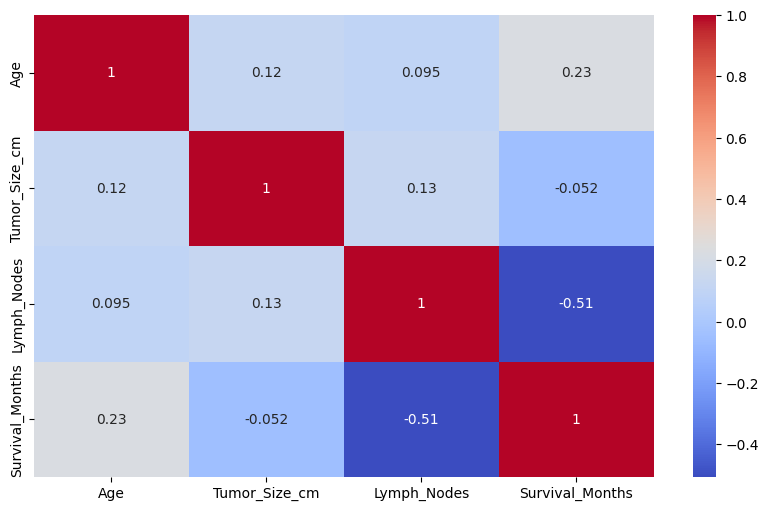

In [47]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_cancer.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.show()



---



##  Data Preprocessing & Train/Test Split

In [48]:
# Convert 'Metastasis' to numerical (1 for Yes, 0 for No)
df_cancer['Metastasis'] = df_cancer['Metastasis'].apply(lambda x: 1 if x == 'Yes' else 0)

X = df_cancer.drop('Metastasis', axis=1)
y = df_cancer['Metastasis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(24, 9) (6, 9)




---



# Data Scaling

In [49]:
# Drop the 'Patient_ID' column as it's not a feature
X_train = X_train.drop('Patient_ID', axis=1)
X_test = X_test.drop('Patient_ID', axis=1)

# Select categorical columns for one-hot encoding
categorical_cols = ['Gender', 'Cancer_Type', 'Stage', 'Treatment_Type']

# Apply one-hot encoding to the categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure consistent columns after one-hot encoding, adding missing columns with 0
missing_cols = set(X_train.columns) - set(X_test.columns)
for c in missing_cols:
    X_test[c] = 0
X_test = X_test[X_train.columns]

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



---



# Machine Learning Models

###  Evaluation

Compare the models using metrics and visualize results:

- Confusion matrices
- ROC curves
- Metric comparison table


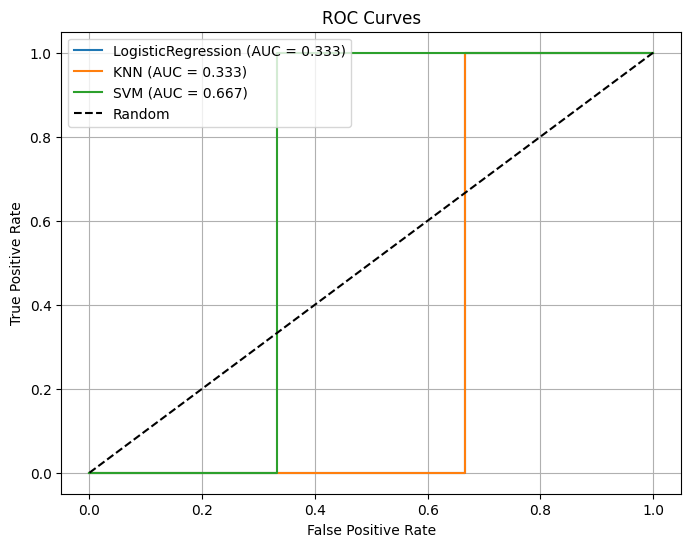

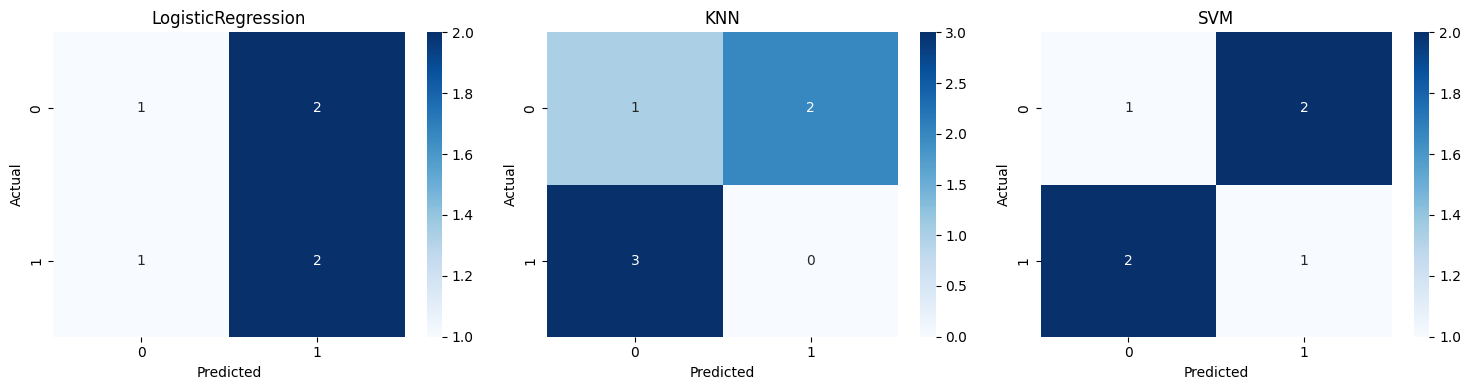

Saved results to cancer_model_comparison_results.csv


In [55]:
from sklearn.metrics import roc_curve

#  Plot ROC curves for all models
plt.figure(figsize=(8,6))
for name, (model, y_pred, y_proba) in trained_cancer.items():
    # y_proba may already be scores
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0,1],[0,1],"k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

# Display & visualize confusion matrices side-by-side
fig, axes = plt.subplots(1, len(trained_cancer), figsize=(5*len(trained_cancer),4))
if len(trained_cancer) == 1:
    axes = [axes]
for ax, (name, (model, y_pred, _)) in zip(axes, trained_cancer.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap="Blues")
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

# Save result table for later
results_df_cancer.to_csv("cancer_model_comparison_results.csv")
print("Saved results to cancer_model_comparison_results.csv")